Read ../audio/pulse3k3d300-az0-el0.wav, 44100 smps, 131072 samples per channel, 16 channels, 2.972154195011338 seconds


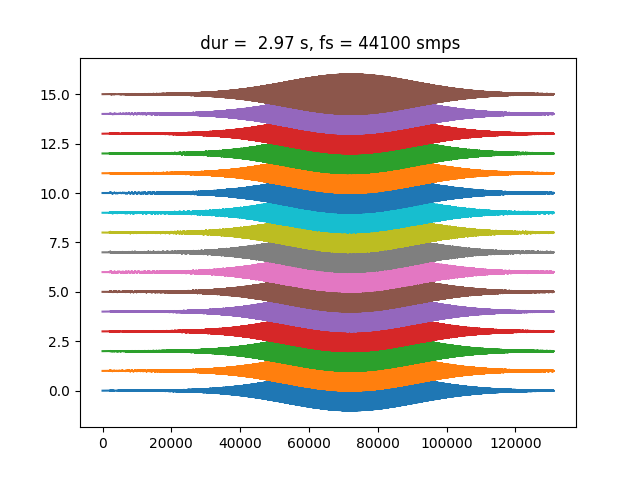

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
from ipywidgets import IntSlider
import scipy.io.wavfile as wv

%matplotlib widget

# Generate the array geometry (for simplicity, a linear array)
PI = np.pi
Fs = 44100
speed_of_sound = 343.0
default_f0 = 6100
mic_positions = np.array([-1.5, -0.5, 0.5, 1.5, 2.5]) * 0.042

# Construct the steering vector for the given angle
def steering_vector(f0, angle):
    # Create an array with our microphone positions, in meters
    # mic_positions = np.array([n*distance for n in np.arange(num_elements)])
    # Angle to radians
    angle_rad = np.radians(angle)

    # Wavelength
    l = speed_of_sound / f0
    # mic_position in wavelengts
    d = mic_positions / l

    # Create the steering vector with the beam direction applied
    steering_vector = np.exp(-1j * 2*PI*d*np.sin(angle_rad))
    # print(angle_deg, steering_vector, np.sum(steering_vector))

    return steering_vector

def read_wav_file(filename):
    fs, data = wv.read(filename, Fs)
    npt, nch = data.shape
    dur = npt/fs
    print(f"Read {filename}, {fs} smps, {npt} samples per channel, {nch} channels, {dur} seconds")
    return data

# Load file
signals = read_wav_file("../audio/pulse3k3d300-az0-el0.wav")

# Plot loaded audio
dur = signals.shape[0]/Fs
plt.close("all")
for ch in range(16):
    plt.plot(signals[:,ch]+ch, '-')
plt.title(" dur = %5.2f s, fs = %5.0f smps" % (dur, Fs))
plt.show()



In [14]:
print(signals)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.00572391 0.00361755 0.00561244 ... 0.00497867 0.00851561 0.00466946]
 [0.00373007 0.00461711 0.00340608 ... 0.00324607 0.00579015 0.00150971]
 [0.00100688 0.00098326 0.00212223 ... 0.00219361 0.00378166 0.00023688]]
